In [1]:
import math
from tensorboardX import SummaryWriter
import roboschool
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
import gym
import wrappers
env_name = 'SuperMarioBros-v1' #'SuperMarioBros-v1'# 'PongNoFrameskip-v4' #SuperMarioBros-v1'
#env = wrappers.make_atari_deepmind(env_name, skip=4)
#env_name = 'CartPole-v1'#'CartPole-v1' #'RoboschoolAnt-v1' #'CarRacing-v0' #'LunarLander-v2' #'Acrobot-v1' #
#env = gym.make(env_name)
from vecenv import create_super_mario_env

env = create_super_mario_env()

observation_shape = env.observation_space.shape
n_actions = env.action_space.n
shape =(None, ) + observation_shape
print(shape)
print(n_actions)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



/home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


(None, 84, 84, 4)
12


In [4]:
# The typical imports
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

In [5]:
from a2c_v2 import A2CAgent
import tr_helpers
import networks
import ray
ray.init()

2019-05-08 09:17:34,056	INFO node.py:469 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-05-08_09-17-34_13033/logs.
2019-05-08 09:17:34,169	INFO services.py:407 -- Waiting for redis server at 127.0.0.1:51211 to respond...
2019-05-08 09:17:34,303	INFO services.py:407 -- Waiting for redis server at 127.0.0.1:40210 to respond...
2019-05-08 09:17:34,311	INFO services.py:804 -- Starting Redis shard with 6.74 GB max memory.
2019-05-08 09:17:34,364	INFO node.py:483 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-05-08_09-17-34_13033/logs.
2019-05-08 09:17:34,366	INFO services.py:1427 -- Starting the Plasma object store with 10.11 GB memory using /dev/shm.


{'node_ip_address': '192.168.3.104',
 'redis_address': '192.168.3.104:51211',
 'object_store_address': '/tmp/ray/session_2019-05-08_09-17-34_13033/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2019-05-08_09-17-34_13033/sockets/raylet',
 'webui_url': None}

In [6]:


a2c_config = {
    'GAMMA' : 0.99,
    'TAU' : 0.9,
    'LEARNING_RATE' : 1e-4,
    'NAME' : 'Supermario',
    'SCORE_TO_WIN' : 3000,
    'EPISODES_TO_LOG' : 20, 
    'LIVES_REWARD' : 5,
    'GRAD_NORM' : 0.5,
    'ENTROPY_COEF' : 0.001,
    'TRUNCATE_GRADS' : True,
    'ENV_NAME' : env_name,
    'PPO' : True,
    'E_CLIP' : 0.2,
    'NUM_ACTORS' : 8,
    'STEPS_NUM' : 50,
    'MINIBATCH_SIZE' : 50,
    'MINI_EPOCHS' : 4,
}
#self, sess, env_name, observation_shape, actions_num, config = default_config
observation_shape = env.observation_space.shape
actions_num = env.action_space.n
action_shape = env.action_space.shape
print(action_shape)
agent = A2CAgent(sess,'pong', env.observation_space, True, env.action_space, a2c_config)
#agent.restore('nn/a2cSuperMarioBros-v1')
agent.train()
ray.shutdown()

()
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
(pid=13121) 
(pid=13121) WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
(pid=13121) For more information, please see:
(pid=13121)   * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
(pid=13121)   * https://github.com/tensorflow/addons
(pid=13121) If you depend on functionality not listed there, please file an issue.
(pid=13121) 
(pid=13121) /home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
(pid=13121)   result = entry_point.load(False)
(pid=13124) 
(pid=13124) WARNING: The Tensor

Frames per seconds:  306.3265281529389
saving next best rewards:  343.55172413793105
Frames per seconds:  305.5572048102612
saving next best rewards:  350.0833333333333
Frames per seconds:  304.2751550718716
saving next best rewards:  358.44444444444446
Frames per seconds:  311.7340252722607
saving next best rewards:  365.1014492753623
Frames per seconds:  307.92178942304383
saving next best rewards:  368.49295774647885
Frames per seconds:  308.34795625481576
saving next best rewards:  374.47945205479454
Frames per seconds:  313.01177895716273
Frames per seconds:  284.59195531646617
Frames per seconds:  258.7877333633112
Frames per seconds:  299.417213857058
Frames per seconds:  306.38002950209767
Frames per seconds:  297.3089816601157
Frames per seconds:  304.3705208110415
Frames per seconds:  279.8966179274337
Frames per seconds:  289.7045938748565
Frames per seconds:  270.08954487285945
Frames per seconds:  291.62703786044426
saving next best rewards:  375.11
Frames per seconds:  28

Frames per seconds:  307.848044183635
Frames per seconds:  278.9718616676546
Frames per seconds:  307.1410912985049
Frames per seconds:  311.71729810484567
Frames per seconds:  309.92992574043797
Frames per seconds:  309.84264916505157
Frames per seconds:  312.93111642357445
Frames per seconds:  312.2566906420832
Frames per seconds:  309.42416750718104
Frames per seconds:  281.80837720508816
Frames per seconds:  309.77022313582466
Frames per seconds:  311.6653209704647
Frames per seconds:  308.3447373654168
Frames per seconds:  307.3838299389205
Frames per seconds:  308.46517412898737
Frames per seconds:  308.6029832991226
Frames per seconds:  306.5894483712355
Frames per seconds:  310.55509439664905
Frames per seconds:  279.06916088774557
Frames per seconds:  308.00968346331126
Frames per seconds:  312.9331243085604
Frames per seconds:  308.60884155431046
Frames per seconds:  307.992584628304
Frames per seconds:  310.6133725138938
Frames per seconds:  308.59240267315533
Frames per sec

Frames per seconds:  317.23126941473106
Frames per seconds:  280.8015425960598
Frames per seconds:  309.0094783297576
Frames per seconds:  314.1603781096271
Frames per seconds:  308.16241318498624
Frames per seconds:  312.2324693319342
Frames per seconds:  309.95821188209703
Frames per seconds:  307.4207109581823
Frames per seconds:  310.4471973438778
Frames per seconds:  318.1678742616446
Frames per seconds:  285.60372175824625
Frames per seconds:  312.09562678866234
Frames per seconds:  308.9446093036264
Frames per seconds:  304.94346304293487
Frames per seconds:  311.74996640420324
Frames per seconds:  306.86779463501693
Frames per seconds:  314.1348489004055
Frames per seconds:  308.42082994191827
Frames per seconds:  306.68126989600427
Frames per seconds:  283.1100510215894
Frames per seconds:  304.84470254793615
Frames per seconds:  303.08982522292
Frames per seconds:  310.371824247266
Frames per seconds:  306.54398390007947
Frames per seconds:  309.178447681385
Frames per second

Frames per seconds:  311.22294406102554
Frames per seconds:  308.6215124948806
Frames per seconds:  284.18538276400324
Frames per seconds:  310.5065153522276
Frames per seconds:  306.6509331192635
Frames per seconds:  311.2525754024099
Frames per seconds:  308.9884896501147
Frames per seconds:  307.86185036517594
Frames per seconds:  312.0539009118396
Frames per seconds:  307.6709107601899
Frames per seconds:  314.08352069146684
Frames per seconds:  281.7710438289493
Frames per seconds:  309.9839831045107
Frames per seconds:  311.88571741305606
Frames per seconds:  312.5044191881092
Frames per seconds:  306.66339894703776
Frames per seconds:  307.98464652878954
Frames per seconds:  306.1371524958333
Frames per seconds:  306.63418656116994
Frames per seconds:  315.74776848979843
Frames per seconds:  280.96195364932674
Frames per seconds:  306.78214414497444
Frames per seconds:  307.9266949717468
Frames per seconds:  301.87640662122294
Frames per seconds:  309.5875351406945
Frames per se

Frames per seconds:  308.58672667068765
Frames per seconds:  309.5658738177253
Frames per seconds:  307.40401539928257
Frames per seconds:  309.7618042339464
Frames per seconds:  306.5810670162929
Frames per seconds:  278.34317252249895
Frames per seconds:  308.57855359394387
Frames per seconds:  309.009114076732
Frames per seconds:  309.63356408983446
Frames per seconds:  310.56309656797856
Frames per seconds:  308.4468678475977
Frames per seconds:  312.36056874398446
Frames per seconds:  309.8634335640075
Frames per seconds:  311.76873639641383
Frames per seconds:  279.9328209923987
Frames per seconds:  307.7854460910743
Frames per seconds:  307.5333237770772
Frames per seconds:  306.98878781666355
Frames per seconds:  306.6284254506833
Frames per seconds:  304.7824560342843
Frames per seconds:  311.42162578075295
Frames per seconds:  304.8689656365474
Frames per seconds:  280.51610419595323
Frames per seconds:  309.17696629006423
Frames per seconds:  311.5219872978949
Frames per sec

Frames per seconds:  306.63474699203175
Frames per seconds:  309.94373606176373
Frames per seconds:  310.51097488641335
Frames per seconds:  306.75519747452137
Frames per seconds:  312.6335108844703
Frames per seconds:  309.12615176890773
Frames per seconds:  314.15263655623784
Frames per seconds:  280.00052604774123
Frames per seconds:  309.3516631683354
Frames per seconds:  310.6671393244835
Frames per seconds:  310.56509717524716
Frames per seconds:  310.6338003290821
Frames per seconds:  313.3586059077936
Frames per seconds:  306.79347617384434
Frames per seconds:  309.1163325924365
Frames per seconds:  281.46513930440875
Frames per seconds:  308.6525129992234
Frames per seconds:  306.4011353406632
Frames per seconds:  311.9985622624847
Frames per seconds:  308.1165715766682
Frames per seconds:  310.26892018707105
Frames per seconds:  308.19080786504134
Frames per seconds:  310.0306341877062
Frames per seconds:  308.17237563475123
Frames per seconds:  272.56426825762304
Frames per 

Frames per seconds:  312.78829585390906
Frames per seconds:  310.3266776513658
Frames per seconds:  312.1911251255298
Frames per seconds:  277.78619258963334
Frames per seconds:  312.5394185429595
Frames per seconds:  310.0102168827724
Frames per seconds:  308.9110019288967
Frames per seconds:  312.20325534276225
Frames per seconds:  309.02719116927074
Frames per seconds:  307.9034797692198
Frames per seconds:  310.3390767304737
Frames per seconds:  279.9459744764375
Frames per seconds:  307.690389069552
Frames per seconds:  310.9094933491391
Frames per seconds:  309.92262028046036
Frames per seconds:  312.48800502567076
Frames per seconds:  312.4767372939062
Frames per seconds:  313.759942117955
Frames per seconds:  316.25177275526335
Frames per seconds:  308.8011065969831
Frames per seconds:  282.41856393768256
Frames per seconds:  310.8866788264901
Frames per seconds:  308.24530226391016
Frames per seconds:  305.1156489268186
Frames per seconds:  312.46442287184055
Frames per second

Frames per seconds:  306.2491397863202
Frames per seconds:  307.1302283502246
Frames per seconds:  311.15010220324893
Frames per seconds:  300.10327555368764
Frames per seconds:  300.53260778909157
Frames per seconds:  308.0128501225867
Frames per seconds:  306.40357512136546
Frames per seconds:  311.05260983814645
Frames per seconds:  311.66302826082415
Frames per seconds:  307.9265367258006
Frames per seconds:  311.55880350183355
Frames per seconds:  312.3921155978576
Frames per seconds:  278.41029552232663
Frames per seconds:  309.45418790505477
Frames per seconds:  308.0415339738429
Frames per seconds:  310.8144549221653
Frames per seconds:  312.881464489446
Frames per seconds:  309.65736098322446
Frames per seconds:  311.29681350612594
Frames per seconds:  307.2989943904048
Frames per seconds:  308.20849491551627
Frames per seconds:  280.52874967151956
Frames per seconds:  308.97226066293246
Frames per seconds:  310.8873931698528
Frames per seconds:  314.0301637278324
Frames per s

Frames per seconds:  307.4149653182775
Frames per seconds:  313.9115453297629
Frames per seconds:  309.46117447571567
Frames per seconds:  306.1340019426495
Frames per seconds:  279.56241588407306
Frames per seconds:  306.067721295406
Frames per seconds:  305.4734188927078
Frames per seconds:  309.0280108356789
Frames per seconds:  311.74588828503136
Frames per seconds:  311.17050833741496
Frames per seconds:  311.854295935117
Frames per seconds:  306.9234841208245
Frames per seconds:  312.2905184331866
Frames per seconds:  279.2943301833427
Frames per seconds:  307.18099617567606
Frames per seconds:  317.2750154427753
Frames per seconds:  310.4071745188538
Frames per seconds:  313.7513049582279
Frames per seconds:  315.43088240093937
Frames per seconds:  309.6746223059282
Frames per seconds:  311.26197639107284
Frames per seconds:  311.23158114144553
Frames per seconds:  277.8212996656517
Frames per seconds:  307.31788522003365
Frames per seconds:  311.8669797106346
Frames per seconds

Frames per seconds:  307.1722675037786
Frames per seconds:  309.0587742382445
Frames per seconds:  306.5159366503642
Frames per seconds:  312.06506851429924
Frames per seconds:  310.9476633094562
Frames per seconds:  279.64979768530225
Frames per seconds:  315.13989423968434
Frames per seconds:  310.76888013800277
Frames per seconds:  305.6680998405525
Frames per seconds:  307.7626586653197
Frames per seconds:  312.18573422043033
Frames per seconds:  311.8314816490363
Frames per seconds:  314.33875122430715
Frames per seconds:  309.2032687950852
Frames per seconds:  280.8336364764267
Frames per seconds:  312.78582331283144
Frames per seconds:  307.51614251086403
Frames per seconds:  309.5307148962336
Frames per seconds:  307.4846259666388
Frames per seconds:  305.305873713126
Frames per seconds:  307.09593526412436
Frames per seconds:  308.5663855929217
Frames per seconds:  307.82619634174273
Frames per seconds:  281.34962905324727
Frames per seconds:  309.0201103432748
Frames per seco

Frames per seconds:  309.04820787872865
Frames per seconds:  312.0623055611067
Frames per seconds:  310.96426186779445
Frames per seconds:  314.85889653633774
Frames per seconds:  307.92997296006956
Frames per seconds:  307.3567774695232
Frames per seconds:  281.7793161428161
Frames per seconds:  306.97164487257646
Frames per seconds:  306.88598131716395
Frames per seconds:  311.36942358591256
Frames per seconds:  307.63187128570974
Frames per seconds:  305.1979284136432
Frames per seconds:  313.1112982210759
Frames per seconds:  308.47992054533296
Frames per seconds:  311.70643335810803
Frames per seconds:  280.93238948499527
Frames per seconds:  309.16352046419814
Frames per seconds:  311.7614598595703
Frames per seconds:  310.4606861202007
Frames per seconds:  309.44279544849576
Frames per seconds:  308.96122228399196
Frames per seconds:  306.85378562380816
Frames per seconds:  305.37269186029624
Frames per seconds:  276.4180009810348
Frames per seconds:  306.9713977405937
Frames pe

Frames per seconds:  308.530363947493
Frames per seconds:  312.49715483543866
Frames per seconds:  306.84617549524376
Frames per seconds:  310.19519359502965
Frames per seconds:  311.6200751400183
Frames per seconds:  310.501182469222
Frames per seconds:  314.5940901550512
Frames per seconds:  309.1135077012989
Frames per seconds:  277.0184173514296
Frames per seconds:  311.10918258167044
Frames per seconds:  306.1894030374503
Frames per seconds:  306.50959760779074
Frames per seconds:  312.4011434512983
Frames per seconds:  310.991883952232
Frames per seconds:  308.6711844394488
Frames per seconds:  312.88104437105955
Frames per seconds:  281.5550756055513
Frames per seconds:  306.86406775395295
Frames per seconds:  313.13696524483873
Frames per seconds:  307.6593332814492
Frames per seconds:  313.14951977514596
Frames per seconds:  308.8729436381609
Frames per seconds:  309.1840770978727
Frames per seconds:  310.6000084716418
Frames per seconds:  305.46385264105123
Frames per seconds

Frames per seconds:  276.2463047983812
Frames per seconds:  312.20771726898636
Frames per seconds:  304.9629301308875
Frames per seconds:  310.4020058479229
Frames per seconds:  310.01211871790525
Frames per seconds:  307.58099944259567
Frames per seconds:  308.84842569040916
Frames per seconds:  311.5781291275167
Frames per seconds:  277.7282522061209
Frames per seconds:  312.2154562247074
Frames per seconds:  307.90483596520033
Frames per seconds:  308.0771021286041
Frames per seconds:  310.7126382354342
Frames per seconds:  307.67488296144586
Frames per seconds:  308.8858864993658
Frames per seconds:  307.1538894222154
Frames per seconds:  307.79567781690787
Frames per seconds:  278.2417273034659
Frames per seconds:  309.3046459441183
Frames per seconds:  312.62791827332774
Frames per seconds:  316.5902157465572
Frames per seconds:  319.29457608533636
Frames per seconds:  305.2465709918295
Frames per seconds:  311.519511598953
Frames per seconds:  307.86318359720497
Frames per secon

Frames per seconds:  282.3300896895126
Frames per seconds:  307.6794872321534
Frames per seconds:  307.0264955494999
Frames per seconds:  304.8289059186957
Frames per seconds:  309.72031122493775
Frames per seconds:  306.06705126353694
Frames per seconds:  307.1697254838433
Frames per seconds:  311.010286027159
Frames per seconds:  305.97267309109213
Frames per seconds:  274.34822653660336
Frames per seconds:  305.16997150134415
Frames per seconds:  306.27056305521666
Frames per seconds:  309.5148400280683
Frames per seconds:  305.5331659020271
Frames per seconds:  310.43152701776046
Frames per seconds:  311.14266986461155
Frames per seconds:  312.7643651641842
Frames per seconds:  312.29021615930384
Frames per seconds:  280.41111949401295
Frames per seconds:  308.9631567882477
Frames per seconds:  308.2322544688049
Frames per seconds:  308.0562172865475
Frames per seconds:  307.76272641282316
Frames per seconds:  309.97195600077066
Frames per seconds:  313.6720671338202
Frames per sec

Frames per seconds:  308.7299165282488
Frames per seconds:  280.4394677438756
Frames per seconds:  314.29284364951917
Frames per seconds:  313.7630403454764
Frames per seconds:  306.15187828155115
Frames per seconds:  311.5744489732791
Frames per seconds:  308.60484520107894
Frames per seconds:  307.2292152781618
Frames per seconds:  310.1427137236042
Frames per seconds:  310.58986544821187
Frames per seconds:  280.75239132627684
Frames per seconds:  311.30476152658906
Frames per seconds:  304.48144013783576
Frames per seconds:  311.22324427235657
Frames per seconds:  304.87689906405797
Frames per seconds:  310.30697892995204
Frames per seconds:  310.4180637489138
Frames per seconds:  301.36610115639604
Frames per seconds:  305.819095377727
Frames per seconds:  276.48381582766325
Frames per seconds:  303.79105789125185
Frames per seconds:  309.4566765492813
Frames per seconds:  313.7776403925991
Frames per seconds:  312.6189239100888
Frames per seconds:  310.8815863447341
Frames per se

Frames per seconds:  311.91412973452856
Frames per seconds:  308.549633460187
Frames per seconds:  275.9364960486508
Frames per seconds:  308.84831197986875
Frames per seconds:  307.9039092299877
Frames per seconds:  309.3484232892535
Frames per seconds:  311.22021909235497
Frames per seconds:  312.39514033598886
Frames per seconds:  306.88427482077765
Frames per seconds:  315.20341170562887
Frames per seconds:  307.98344793393625
Frames per seconds:  275.33968901342973
Frames per seconds:  311.62484455178236
Frames per seconds:  307.2147907120919
Frames per seconds:  305.4385828210896
Frames per seconds:  311.87567576530597
Frames per seconds:  307.08440101613115
Frames per seconds:  313.70261248067453
Frames per seconds:  306.0116274531048
Frames per seconds:  315.4929746973266
Frames per seconds:  283.47151060981156
Frames per seconds:  312.0142983542104
Frames per seconds:  306.7182740895884
Frames per seconds:  308.1490328171831
Frames per seconds:  304.3219362120992
Frames per se

Frames per seconds:  304.911873115839
Frames per seconds:  309.48889554783716
Frames per seconds:  305.02487328822286
Frames per seconds:  312.21671122665254
Frames per seconds:  276.261534186336
Frames per seconds:  309.9650837890773
Frames per seconds:  311.5021828080785
Frames per seconds:  307.70977954639795
Frames per seconds:  311.0549166438435
Frames per seconds:  306.67644879496004
Frames per seconds:  305.5906652534062
Frames per seconds:  309.0369136036972
Frames per seconds:  303.4733531505255
Frames per seconds:  275.2419742330762
Frames per seconds:  309.8528350033565
Frames per seconds:  309.79463596302884
Frames per seconds:  307.7035716190513
Frames per seconds:  308.2041012717311
Frames per seconds:  308.3993995985657
Frames per seconds:  305.82288611424116
Frames per seconds:  312.26471100186524
Frames per seconds:  292.81575488699485
Frames per seconds:  316.44632839844115
Frames per seconds:  306.6785566065355
Frames per seconds:  308.49301200703997
Frames per secon

Frames per seconds:  306.49329201746605
Frames per seconds:  298.94085391390274
Frames per seconds:  312.1033369643535
Frames per seconds:  306.78903302117095
Frames per seconds:  311.05477823453685
Frames per seconds:  308.3573412877978
Frames per seconds:  277.06694698119657
Frames per seconds:  309.3581203128524
Frames per seconds:  308.2007721508393
Frames per seconds:  308.2486776546342
Frames per seconds:  308.53932885127966
Frames per seconds:  310.98268373136455
Frames per seconds:  306.18008245093336
Frames per seconds:  308.1658094023141
Frames per seconds:  277.7150304716192
Frames per seconds:  306.7612774503652
Frames per seconds:  310.51623914058536
Frames per seconds:  307.03355273343635
Frames per seconds:  305.38858937152906
Frames per seconds:  310.33701014848333
Frames per seconds:  303.0848535615164
Frames per seconds:  307.9376821593956
Frames per seconds:  309.3167353741547
Frames per seconds:  277.5797777206422
Frames per seconds:  303.9271219064487
Frames per se

Frames per seconds:  307.75895518051243
Frames per seconds:  308.89441709757654
Frames per seconds:  308.8843851628411
Frames per seconds:  302.5276611704967
Frames per seconds:  309.60661698162954
Frames per seconds:  303.97414856083674
Frames per seconds:  276.21970743380194
Frames per seconds:  309.25814466377767
Frames per seconds:  306.3967930747948
Frames per seconds:  303.83280410325654
Frames per seconds:  313.3701480458297
Frames per seconds:  313.5083451158282
Frames per seconds:  312.0156677942009
Frames per seconds:  309.8244078878798
Frames per seconds:  311.032173034071
Frames per seconds:  281.7913563508071
Frames per seconds:  303.1906953659642
Frames per seconds:  305.35548439199823
Frames per seconds:  312.8658975228844
Frames per seconds:  310.76713018539317
Frames per seconds:  307.54058467923915
Frames per seconds:  311.72915984452425
Frames per seconds:  304.94337436029423
Frames per seconds:  304.9802486157816
Frames per seconds:  278.0972208869425
Frames per sec

Frames per seconds:  309.26993400360067
Frames per seconds:  304.5785055922849
Frames per seconds:  308.66098528278036
Frames per seconds:  306.2237175201152
Frames per seconds:  306.44554990970596
Frames per seconds:  313.9681992878364
Frames per seconds:  310.0594888144573
Frames per seconds:  275.24672466028625
Frames per seconds:  310.11792499564507
Frames per seconds:  304.7934636205516
Frames per seconds:  306.69136106327176
Frames per seconds:  312.41322018448324
Frames per seconds:  306.4867747462095
Frames per seconds:  310.7929209556908
Frames per seconds:  311.74623584784706
Frames per seconds:  311.17588732302414
Frames per seconds:  275.88861564403976
Frames per seconds:  309.08312060538174
Frames per seconds:  312.3894399167975
Frames per seconds:  309.3270235390833
Frames per seconds:  308.4468678475977
Frames per seconds:  306.8702194014255
Frames per seconds:  313.14489061329243
Frames per seconds:  311.34654151650705
Frames per seconds:  310.9658296010006
Frames per s

Frames per seconds:  308.4183352514328
Frames per seconds:  311.66129138203814
Frames per seconds:  306.15554318889053
Frames per seconds:  312.8486753079442
Frames per seconds:  303.88554792773266
Frames per seconds:  307.4948151583516
Frames per seconds:  309.6416331356613
Frames per seconds:  311.36942358591256
Frames per seconds:  276.7850101886324
Frames per seconds:  313.6105487532604
Frames per seconds:  305.1123418017331
Frames per seconds:  309.34251410710556
Frames per seconds:  310.5626366619054
Frames per seconds:  312.22379985299597
Frames per seconds:  311.5456125353184
Frames per seconds:  308.8298010202278
Frames per seconds:  305.9742578601198
Frames per seconds:  278.36306770767175
Frames per seconds:  307.6995535305231
Frames per seconds:  308.56581807898374
Frames per seconds:  311.71836377111157
Frames per seconds:  309.72120318483155
Frames per seconds:  311.779281025458
Frames per seconds:  308.03418153120083
Frames per seconds:  307.5386453985207
Frames per seco

Frames per seconds:  278.1769363597993
Frames per seconds:  310.21912278698295
Frames per seconds:  307.36948095037263
Frames per seconds:  306.9138942084336
Frames per seconds:  309.1115713138132
Frames per seconds:  313.6410586659945
Frames per seconds:  314.89603290537656
Frames per seconds:  321.6036507726439
Frames per seconds:  309.529184442334
Frames per seconds:  279.89932629498276
Frames per seconds:  307.43468164528815
Frames per seconds:  305.8879007203889
Frames per seconds:  306.9628831634938
Frames per seconds:  310.2410133154313
Frames per seconds:  305.5802456471449
Frames per seconds:  307.3274328398279
Frames per seconds:  306.29574705514773
Frames per seconds:  277.4700036245779
Frames per seconds:  310.5864845876149
Frames per seconds:  309.7564969005548
Frames per seconds:  305.9686108003906
Frames per seconds:  311.05586244406925
Frames per seconds:  307.90985399420947
Frames per seconds:  308.0733231878739
Frames per seconds:  309.14852632930496
Frames per second

Frames per seconds:  309.6251983277317
Frames per seconds:  313.25857845434604
Frames per seconds:  281.0877696946887
Frames per seconds:  307.98523452212845
Frames per seconds:  312.815053114667
Frames per seconds:  308.5091226096597
Frames per seconds:  307.375945713457
Frames per seconds:  313.02689321086115
Frames per seconds:  303.4848373134552
Frames per seconds:  308.8487440803679
Frames per seconds:  304.8713145971967
Frames per seconds:  276.68869460953965
Frames per seconds:  308.6418154181977
Frames per seconds:  304.23339756056447
Frames per seconds:  306.03538443656544
Frames per seconds:  308.6330262409566
Frames per seconds:  311.25172079523577
Frames per seconds:  306.22098996392197
Frames per seconds:  312.9919714497985
Frames per seconds:  281.03300082628704
Frames per seconds:  304.87158051955106
Frames per seconds:  308.03033577793576
Frames per seconds:  305.6276962275058
Frames per seconds:  306.9847659055841
Frames per seconds:  304.579036416342
Frames per second

Frames per seconds:  311.065251553378
Frames per seconds:  309.2574605904118
Frames per seconds:  312.4197126870602
Frames per seconds:  279.1912242060551
Frames per seconds:  307.86772571164664
Frames per seconds:  307.00280915756525
Frames per seconds:  305.2018592242395
Frames per seconds:  306.9261343662398
Frames per seconds:  308.180549853004
Frames per seconds:  304.10852450698513
Frames per seconds:  305.53151893010823
Frames per seconds:  281.2743473452885
Frames per seconds:  307.4204631026166
Frames per seconds:  310.091512507005
Frames per seconds:  312.1489323255985
Frames per seconds:  308.06397806191126
Frames per seconds:  312.93989527345786
Frames per seconds:  306.9619171595156
Frames per seconds:  304.51170288549304
Frames per seconds:  312.59103535406234
Frames per seconds:  274.02076200343134
Frames per seconds:  304.5882376606588
Frames per seconds:  309.95720402802834
Frames per seconds:  306.98103618278526
Frames per seconds:  305.91177236620774
Frames per secon

Frames per seconds:  305.5825387901047
Frames per seconds:  309.59788703315854
Frames per seconds:  303.8902596609848
Frames per seconds:  275.829468723475
Frames per seconds:  310.9805393972071
Frames per seconds:  308.03433988780546
Frames per seconds:  315.94210889706534
Frames per seconds:  309.1764648992942
Frames per seconds:  312.59243315821277
Frames per seconds:  313.1296480779384
Frames per seconds:  303.537021052899
Frames per seconds:  310.4034990018446
Frames per seconds:  279.698190582563
Frames per seconds:  307.0520737653415
Frames per seconds:  306.17652870766295
Frames per seconds:  310.5594173575323
Frames per seconds:  304.0437791308864
Frames per seconds:  307.006247278024
Frames per seconds:  305.60217662744134
Frames per seconds:  306.0823063826744
Frames per seconds:  309.48060610711354
Frames per seconds:  278.9182851266599
Frames per seconds:  308.14778766438775
Frames per seconds:  309.97690418187955
Frames per seconds:  307.2209789325702
Frames per seconds: 

Frames per seconds:  306.1417778935235
Frames per seconds:  303.7775263944634
Frames per seconds:  309.3322477251641
Frames per seconds:  305.32034182917454
Frames per seconds:  274.5372820985538
Frames per seconds:  309.49531274765576
Frames per seconds:  304.7525380217356
Frames per seconds:  304.23995176035464
Frames per seconds:  304.9497818138486
Frames per seconds:  310.71390420245285
Frames per seconds:  306.35581620450756
Frames per seconds:  314.16997910703844
Frames per seconds:  313.5333975952969
Frames per seconds:  280.7522597780919
Frames per seconds:  306.78014710190206
Frames per seconds:  310.1388839388244
Frames per seconds:  311.00830274145
Frames per seconds:  310.2828066441278
Frames per seconds:  309.54211382752226
Frames per seconds:  313.51453169825254
Frames per seconds:  304.93120315721234
Frames per seconds:  306.36888464389426
Frames per seconds:  278.6483227403933
Frames per seconds:  309.6621162284264
Frames per seconds:  308.4592305875244
Frames per secon

Frames per seconds:  300.9421806696045
Frames per seconds:  311.93203795478144
Frames per seconds:  303.48365152790484
Frames per seconds:  308.371079830045
Frames per seconds:  308.3749340964361
Frames per seconds:  280.2929136007257
Frames per seconds:  310.4270238149249
Frames per seconds:  313.6624730874818
Frames per seconds:  306.921687370305
Frames per seconds:  309.5095868331738
Frames per seconds:  306.49024611049026
Frames per seconds:  305.9538356856662
Frames per seconds:  307.9552723349042
Frames per seconds:  306.60993307630355
Frames per seconds:  276.5926284372667
Frames per seconds:  309.01364453481864
Frames per seconds:  305.329943547901
Frames per seconds:  308.68972182624793
Frames per seconds:  309.4229120280877
Frames per seconds:  306.28022463303256
Frames per seconds:  307.27816988599153
Frames per seconds:  311.5959756366546
Frames per seconds:  280.75180875667957
Frames per seconds:  305.5320085685537
Frames per seconds:  313.1747020071968
Frames per seconds:

Frames per seconds:  308.8471293952116
Frames per seconds:  307.0471960438438
Frames per seconds:  310.3163917598843
Frames per seconds:  309.9491643359351
Frames per seconds:  305.29754016730027
Frames per seconds:  311.8797340901185
Frames per seconds:  289.265995563944
Frames per seconds:  314.11616932465273
Frames per seconds:  309.4412658638942
Frames per seconds:  307.5392091403942
Frames per seconds:  304.46890794903874
Frames per seconds:  307.4226487518365
Frames per seconds:  303.9117064985076
Frames per seconds:  312.7252116315505
Frames per seconds:  277.0362022555876
Frames per seconds:  307.0853902743866
Frames per seconds:  310.13324263172683
Frames per seconds:  307.65723453356924
Frames per seconds:  311.080570629047
Frames per seconds:  315.5685766435989
Frames per seconds:  311.9536604632749
Frames per seconds:  309.33573821856623
Frames per seconds:  317.6729785393904
Frames per seconds:  278.4679292463879
Frames per seconds:  307.7040005223399
Frames per seconds:  

Frames per seconds:  304.32273110798167
Frames per seconds:  313.16925369724237
Frames per seconds:  313.5934554783774
Frames per seconds:  307.41460481469903
Frames per seconds:  317.7060648676343
Frames per seconds:  303.4950266674935
Frames per seconds:  279.45579761457725
Frames per seconds:  308.7181001537296
Frames per seconds:  308.69203915615276
Frames per seconds:  308.0099775075016
Frames per seconds:  306.4985777056057
Frames per seconds:  303.68358724383893
Frames per seconds:  308.9642947432438
Frames per seconds:  304.7038756700693
Frames per seconds:  305.8188500980132
Frames per seconds:  275.36866624933236
Frames per seconds:  303.8728225746798
Frames per seconds:  305.72284216791786
Frames per seconds:  312.22796021310063
Frames per seconds:  306.7148199870259
Frames per seconds:  303.02877488219474
Frames per seconds:  310.3560696704056
Frames per seconds:  310.2882008923875
Frames per seconds:  311.75717288700037
Frames per seconds:  275.3517274738041
Frames per sec

Frames per seconds:  314.54593777691383
Frames per seconds:  303.1528283286988
Frames per seconds:  310.989439730181
Frames per seconds:  307.9883554474337
Frames per seconds:  305.7523715049238
Frames per seconds:  311.080778277485
Frames per seconds:  314.1881943765588
Frames per seconds:  278.4846249318363
Frames per seconds:  307.66393708677157
Frames per seconds:  305.25714558531473
Frames per seconds:  305.0954521668427
Frames per seconds:  305.9014870227382
Frames per seconds:  302.8363033544235
Frames per seconds:  308.99240489245244
Frames per seconds:  311.2447455283702
Frames per seconds:  309.58543285417005
Frames per seconds:  284.6491827550116
Frames per seconds:  308.51416035468463
Frames per seconds:  309.3842482607249
Frames per seconds:  316.0485491943946
Frames per seconds:  310.9550863345664
Frames per seconds:  308.12890785328693
Frames per seconds:  310.62630061632706
Frames per seconds:  311.34721175153294
Frames per seconds:  301.834110208385
Frames per seconds:

Frames per seconds:  272.94117769551525
Frames per seconds:  308.9489785718826
Frames per seconds:  317.961747592452
Frames per seconds:  305.53857432659635
Frames per seconds:  302.99396880544145
Frames per seconds:  306.05789445533196
Frames per seconds:  308.037416562722
Frames per seconds:  310.53012475461645
Frames per seconds:  309.43302463097217
Frames per seconds:  274.3913372939033
Frames per seconds:  307.52673965290415
Frames per seconds:  306.57544235322945
Frames per seconds:  305.95783062879843
Frames per seconds:  312.72996829756374
Frames per seconds:  306.59061372960036
Frames per seconds:  308.76357542917714
Frames per seconds:  308.8505634641538
Frames per seconds:  309.620512784171
Frames per seconds:  279.8026046973945
Frames per seconds:  309.92243707585953
Frames per seconds:  307.83225106898635
Frames per seconds:  308.0279378862693
Frames per seconds:  312.55579152445006
Frames per seconds:  307.7699078173394
Frames per seconds:  312.8167562164654
Frames per se

Frames per seconds:  309.2484767077348
Frames per seconds:  277.7879035778926
Frames per seconds:  305.1695718367963
Frames per seconds:  306.92447234257725
Frames per seconds:  308.30380439460583
Frames per seconds:  304.6988066465147
Frames per seconds:  306.815716311567
Frames per seconds:  311.0548935756172
Frames per seconds:  308.0874211455467
Frames per seconds:  309.48528741713255
Frames per seconds:  277.38095175111647
Frames per seconds:  304.8113387994821
Frames per seconds:  310.9129964814672
Frames per seconds:  308.68524629737027
Frames per seconds:  305.21338574414784
Frames per seconds:  308.01305369576755
Frames per seconds:  308.49176407283176
Frames per seconds:  303.56445985365116
Frames per seconds:  309.4227294137956
Frames per seconds:  276.28264340246466
Frames per seconds:  308.81420259776826
Frames per seconds:  312.0411787129837
Frames per seconds:  309.5546787525452
Frames per seconds:  314.2461725282741
Frames per seconds:  313.17937881930374
Frames per sec

Frames per seconds:  303.11856330769297
Frames per seconds:  306.9513364441921
Frames per seconds:  309.5757901231224
Frames per seconds:  278.0754832040062
Frames per seconds:  307.2067576486485
Frames per seconds:  313.12621169903747
Frames per seconds:  304.7530915955712
Frames per seconds:  308.24444143783774
Frames per seconds:  304.58852520850166
Frames per seconds:  302.5731425130189
Frames per seconds:  307.58052577057856
Frames per seconds:  305.60101877109645
Frames per seconds:  273.76610698805547
Frames per seconds:  307.37896419770965
Frames per seconds:  307.33484166112044
Frames per seconds:  304.3753359478881
Frames per seconds:  302.74969770533227
Frames per seconds:  305.58227162604686
Frames per seconds:  308.3299812045551
Frames per seconds:  311.74415048257754
Frames per seconds:  277.97754907449263
Frames per seconds:  305.66201856984446
Frames per seconds:  310.5209288448518
Frames per seconds:  309.135994353702
Frames per seconds:  314.37015699679984
Frames per 

Frames per seconds:  304.54409444742504
Frames per seconds:  303.21053112504495
Frames per seconds:  304.2343906029867
Frames per seconds:  304.0400764495912
Frames per seconds:  309.2438253593556
Frames per seconds:  272.6993746963725
Frames per seconds:  304.28846603225355
Frames per seconds:  308.50417579491625
Frames per seconds:  306.8053252101892
Frames per seconds:  306.062271787971
Frames per seconds:  311.83016019206275
Frames per seconds:  307.9502754354622
Frames per seconds:  308.12472019910143
Frames per seconds:  282.54330905235753
Frames per seconds:  302.4149988121302
Frames per seconds:  305.30542924586365
Frames per seconds:  312.85567597960215
Frames per seconds:  304.93936152477823
Frames per seconds:  305.6782358294809
Frames per seconds:  309.32467385353146
Frames per seconds:  304.08716011442823
Frames per seconds:  306.30046672017164
Frames per seconds:  276.6334005146301
Frames per seconds:  303.1608699002157
Frames per seconds:  309.6899419126095
Frames per se

Frames per seconds:  312.00605875717963
Frames per seconds:  316.765952831878
Frames per seconds:  311.47400739522635
Frames per seconds:  304.4378361076009
Frames per seconds:  304.59878881011014
Frames per seconds:  308.7480064230242
Frames per seconds:  274.7399150280684
Frames per seconds:  304.93342006172526
Frames per seconds:  308.9075665158157
Frames per seconds:  310.0471808227615
Frames per seconds:  306.91883507206035
Frames per seconds:  310.9281392181028
Frames per seconds:  312.5090527176631
Frames per seconds:  308.4664899057723
Frames per seconds:  309.0953066166805
Frames per seconds:  281.0618704752503
Frames per seconds:  309.6893931244044
Frames per seconds:  305.2876516164843
Frames per seconds:  306.17293034727595
Frames per seconds:  310.2641921894839
Frames per seconds:  308.7254625577898
Frames per seconds:  305.2477261638746
Frames per seconds:  309.69860845089556
Frames per seconds:  307.6807511737089
Frames per seconds:  277.2463723282433
Frames per seconds:

Frames per seconds:  311.42791526893757
Frames per seconds:  314.3246642519229
Frames per seconds:  307.3527459105409
Frames per seconds:  307.5211027843013
Frames per seconds:  309.1571398034923
Frames per seconds:  305.3106073697541
Frames per seconds:  300.84409558431037
Frames per seconds:  280.1569165789375
Frames per seconds:  304.0794440954865
Frames per seconds:  307.091348441855
Frames per seconds:  311.44350134544385
Frames per seconds:  309.1627228672064
Frames per seconds:  306.7014977487153
Frames per seconds:  311.15125632494835
Frames per seconds:  307.07410411546846
Frames per seconds:  311.29593555201336
Frames per seconds:  276.8977160234851
Frames per seconds:  313.15786664010665
Frames per seconds:  314.26147686794076
Frames per seconds:  308.499728335441
Frames per seconds:  306.9563009777467
Frames per seconds:  308.3471628603427
Frames per seconds:  307.35513330141293
Frames per seconds:  307.33270229914217
Frames per seconds:  309.77539366651985
Frames per secon

Frames per seconds:  277.7188736554802
Frames per seconds:  309.45379977149
Frames per seconds:  306.81131740088057
Frames per seconds:  309.15848427795385
Frames per seconds:  310.16509807021635
Frames per seconds:  308.12691587385814
Frames per seconds:  306.83311119904306
Frames per seconds:  311.2771300399176
Frames per seconds:  309.07774539926464
Frames per seconds:  279.50686141609475
Frames per seconds:  304.5331048653515
Frames per seconds:  306.9272124452672
Frames per seconds:  306.7515630653128
Frames per seconds:  303.855651642357
Frames per seconds:  304.9752147432686
Frames per seconds:  315.5563734381882
Frames per seconds:  309.7129241648215
Frames per seconds:  311.01026296555193
Frames per seconds:  276.2018089446286
Frames per seconds:  302.5815899300874
Frames per seconds:  305.50581511551275
Frames per seconds:  305.3629985259331
Frames per seconds:  307.70210432736894
Frames per seconds:  312.22944774306256
Frames per seconds:  304.4912765288942
Frames per second

Frames per seconds:  306.3976436120247
Frames per seconds:  310.0301758573036
Frames per seconds:  278.80246469040577
Frames per seconds:  311.29207723343296
Frames per seconds:  312.4236455528332
Frames per seconds:  306.30057856233924
Frames per seconds:  307.10040979630554
Frames per seconds:  311.31756238944814
Frames per seconds:  316.15796863102065
Frames per seconds:  319.5197890987049
Frames per seconds:  307.328874041517
Frames per seconds:  273.61559013085173
Frames per seconds:  305.3818521821607
Frames per seconds:  305.90583757168923
Frames per seconds:  307.88849459898194
Frames per seconds:  311.2832057738627
Frames per seconds:  306.03091855665735
Frames per seconds:  309.7584413765926
Frames per seconds:  309.51027202239527
Frames per seconds:  304.90515694353354
Frames per seconds:  277.00105548640937
Frames per seconds:  306.3340006606811
Frames per seconds:  307.2380822202986
Frames per seconds:  305.7049267695162
Frames per seconds:  306.75569104290764
Frames per s

Frames per seconds:  306.80846715364777
Frames per seconds:  308.1529720941202
Frames per seconds:  301.3094877880084
Frames per seconds:  306.7221768705095
Frames per seconds:  276.7501827712074
Frames per seconds:  306.421863522113
Frames per seconds:  307.42143199482774
Frames per seconds:  309.62485547827225
Frames per seconds:  308.0651320298339
Frames per seconds:  308.19316300171903
Frames per seconds:  312.16865650457925
Frames per seconds:  306.7815831751933
Frames per seconds:  304.71857457838877
Frames per seconds:  278.40990743508337
Frames per seconds:  305.4743533028969
Frames per seconds:  306.67360105299724
Frames per seconds:  309.0095693931482
Frames per seconds:  304.8467852551486
Frames per seconds:  307.94683874806435
Frames per seconds:  306.81726493769554
Frames per seconds:  308.4153643545034
Frames per seconds:  280.43365513559894
Frames per seconds:  307.6536689845378
Frames per seconds:  309.89367663970745
Frames per seconds:  312.4897976942845
Frames per sec

Frames per seconds:  307.2490428281741
Frames per seconds:  307.10641351920054
Frames per seconds:  306.7020135714214
Frames per seconds:  306.51026957867833
Frames per seconds:  314.2348247342571
Frames per seconds:  309.6454277898515
Frames per seconds:  281.20640200362135
Frames per seconds:  309.906430410065
Frames per seconds:  308.9386245169593
Frames per seconds:  314.25066949496744
Frames per seconds:  310.89656470853333
Frames per seconds:  310.73248057747895
Frames per seconds:  310.5436897157443
Frames per seconds:  307.1185565976132
Frames per seconds:  278.62505511978617
Frames per seconds:  310.0524752022199
Frames per seconds:  309.1392525696167
Frames per seconds:  306.00617994296033
Frames per seconds:  312.03790546829487
Frames per seconds:  309.2728757778361
Frames per seconds:  311.2591352461693
Frames per seconds:  310.5213656382447
Frames per seconds:  309.09863231189314
Frames per seconds:  281.3732407145343
Frames per seconds:  305.71457497565723
Frames per seco

Frames per seconds:  306.56854065824575
Frames per seconds:  311.55063422773725
Frames per seconds:  311.5485051955156
Frames per seconds:  304.8034087835447
Frames per seconds:  305.7347869334603
Frames per seconds:  315.63784890260587
Frames per seconds:  276.7785261826442
Frames per seconds:  302.010477866339
Frames per seconds:  309.69298314916773
Frames per seconds:  304.76219263774357
Frames per seconds:  307.24188571020034
Frames per seconds:  314.3453711239918
Frames per seconds:  308.38958118745205
Frames per seconds:  311.5460984984774
Frames per seconds:  307.4272905429568
Frames per seconds:  276.23142274161614
Frames per seconds:  308.59871463309656
Frames per seconds:  308.1374419657773
Frames per seconds:  304.514134777161
Frames per seconds:  308.93127469696697
Frames per seconds:  304.9904277467946
Frames per seconds:  310.16491457883154
Frames per seconds:  311.1892778802676
Frames per seconds:  307.2687603871511
Frames per seconds:  277.7576424336826
Frames per secon

Frames per seconds:  305.80484750856743
Frames per seconds:  306.7961017336454
Frames per seconds:  304.7738852852913
Frames per seconds:  311.9141993220783
Frames per seconds:  308.44552955538234
Frames per seconds:  306.92485415723144
Frames per seconds:  311.47384548229684
Frames per seconds:  276.3954686026566
Frames per seconds:  307.0670001062284
Frames per seconds:  311.4912636523766
Frames per seconds:  310.4509658107531
Frames per seconds:  306.7523931388398
Frames per seconds:  312.02339723174816
Frames per seconds:  301.5312999011072
Frames per seconds:  308.1552587321043
Frames per seconds:  306.7893022994876
Frames per seconds:  273.93904481622303
Frames per seconds:  310.06918462446276
Frames per seconds:  306.74106414467826
Frames per seconds:  306.2216383130411
Frames per seconds:  311.27479683629986
Frames per seconds:  305.2772526631035
Frames per seconds:  307.93795345789846
Frames per seconds:  312.59692951301093
Frames per seconds:  310.16615314989207
Frames per se

Frames per seconds:  311.053140400427
Frames per seconds:  308.5296603948128
Frames per seconds:  321.5343235627407
Frames per seconds:  311.35481565441495
Frames per seconds:  308.26433227869103
Frames per seconds:  312.75554951730714
Frames per seconds:  308.4673746585428
Frames per seconds:  306.08290947133884
Frames per seconds:  277.38731725524974
Frames per seconds:  304.8622513543
Frames per seconds:  309.0039690944755
Frames per seconds:  308.8741491664169
Frames per seconds:  311.9151271590414
Frames per seconds:  311.6472812677374
Frames per seconds:  312.74997585945016
Frames per seconds:  307.06661793783326
Frames per seconds:  311.95326603445545
Frames per seconds:  278.1426800360883
Frames per seconds:  304.14974046899766
Frames per seconds:  305.1581152315465
Frames per seconds:  305.8354631131852
Frames per seconds:  309.85789383711165
Frames per seconds:  304.4767542604237
Frames per seconds:  305.4887038916833
Frames per seconds:  308.2371019581632
Frames per seconds:

Frames per seconds:  278.8529933603359
Frames per seconds:  310.8661716589163
Frames per seconds:  310.5725249426678
Frames per seconds:  307.78885659076855
Frames per seconds:  304.1886070549526
Frames per seconds:  305.7977575144133
Frames per seconds:  308.7804644622684
Frames per seconds:  302.58844425334644
Frames per seconds:  306.19132533930645
Frames per seconds:  281.7358020216605
Frames per seconds:  303.4574787694642
Frames per seconds:  315.0389868167167
Frames per seconds:  315.7285876407766
Frames per seconds:  305.59400502117074
Frames per seconds:  311.03251900727753
Frames per seconds:  306.27774208609827
Frames per seconds:  302.97136008534017
Frames per seconds:  310.52961896542496
Frames per seconds:  276.5420768096979
Frames per seconds:  306.03844363952425
Frames per seconds:  311.53600928865603
Frames per seconds:  306.0366572362063
Frames per seconds:  309.5973614237021
Frames per seconds:  312.8700750125113
Frames per seconds:  308.91766821332806
Frames per sec

Frames per seconds:  313.28742867326787
Frames per seconds:  285.18737131716625
Frames per seconds:  311.53351022757084
Frames per seconds:  316.407942334947
Frames per seconds:  310.9407708177513
Frames per seconds:  310.54649482167565
Frames per seconds:  304.03626366369616
Frames per seconds:  303.1675313615428
Frames per seconds:  305.80268480254773
Frames per seconds:  310.56946640717166
Frames per seconds:  276.6755351657548
Frames per seconds:  304.91191744799227
Frames per seconds:  304.98379681960006
Frames per seconds:  304.7592474721493
Frames per seconds:  306.11279884248995
Frames per seconds:  305.3781168389263
Frames per seconds:  304.8023898728643
Frames per seconds:  311.8662840472105
Frames per seconds:  278.9032436144331
Frames per seconds:  304.47374830179626
Frames per seconds:  308.90235666430254
Frames per seconds:  305.8200319038899
Frames per seconds:  312.1335078495069
Frames per seconds:  305.94040094398457
Frames per seconds:  308.5486347455019
Frames per se

Frames per seconds:  306.80249751609665
Frames per seconds:  311.2948958759162
Frames per seconds:  277.1895178672837
Frames per seconds:  308.56134614218865
Frames per seconds:  313.1262350755099
Frames per seconds:  307.5459291026762
Frames per seconds:  305.56285895478703
Frames per seconds:  307.695806418932
Frames per seconds:  304.92796653450927
Frames per seconds:  309.61765581501237
Frames per seconds:  275.34263526605173
Frames per seconds:  307.71729711737333
Frames per seconds:  309.08457832062214
Frames per seconds:  309.0753311726156
Frames per seconds:  309.2981682232956
Frames per seconds:  309.0241857629747
Frames per seconds:  310.28383957076517
Frames per seconds:  308.43752272760196
Frames per seconds:  307.27947555576264
Frames per seconds:  276.65640966243177
Frames per seconds:  304.5933472455254
Frames per seconds:  305.9294888743902
Frames per seconds:  303.8299429001921
Frames per seconds:  306.85924090399124
Frames per seconds:  309.1824133218623
Frames per se

Frames per seconds:  309.09405380484964
Frames per seconds:  276.21525078415016
Frames per seconds:  307.1237064523156
Frames per seconds:  309.26744836201516
Frames per seconds:  312.41068376036543
Frames per seconds:  307.20266252307607
Frames per seconds:  308.59024576762073
Frames per seconds:  310.2012730494865
Frames per seconds:  312.76326901172405
Frames per seconds:  281.3560647726752
Frames per seconds:  309.05203354614673
Frames per seconds:  306.8352436112812
Frames per seconds:  312.301261161876
Frames per seconds:  308.61313320797905
Frames per seconds:  304.43204674994075
Frames per seconds:  306.8395085246771
Frames per seconds:  308.627008100835
Frames per seconds:  303.8563120269478
Frames per seconds:  278.6560054254923
Frames per seconds:  301.40629548567915
Frames per seconds:  309.2233747670487
Frames per seconds:  316.58015562175865
saving next best rewards:  1014.25
Frames per seconds:  310.96446936098766
saving next best rewards:  1144.05
Frames per seconds:  3

Frames per seconds:  307.0791625502445
Frames per seconds:  304.4429185496386
Frames per seconds:  305.4670116625465
Frames per seconds:  310.00370957522
Frames per seconds:  275.7267838966193
Frames per seconds:  226.11322502608417
Frames per seconds:  315.43712137033884
Frames per seconds:  304.70555800337155
Frames per seconds:  310.2983701342672
Frames per seconds:  312.1860362920852
Frames per seconds:  310.67231682901956
Frames per seconds:  305.62050309911996
Frames per seconds:  310.86485837070444
Frames per seconds:  276.2964753277687
Frames per seconds:  312.55185533102235
Frames per seconds:  310.3693897621044
Frames per seconds:  306.68824394294404
Frames per seconds:  310.4352031985683
Frames per seconds:  307.85039408453366
Frames per seconds:  304.644629542228
Frames per seconds:  307.2242419128384
Frames per seconds:  306.30639446760483
Frames per seconds:  275.3345196673328
Frames per seconds:  307.29469418041856
Frames per seconds:  303.5879702178191
Frames per second

Frames per seconds:  307.4451830298748
Frames per seconds:  307.9885589882377
Frames per seconds:  310.76298563940446
Frames per seconds:  304.32334936320564
Frames per seconds:  308.86211705143626
Frames per seconds:  278.7151299915149
Frames per seconds:  311.83755585848184
Frames per seconds:  306.77386443933096
Frames per seconds:  310.21084006979754
Frames per seconds:  307.97293236019766
Frames per seconds:  311.3911762264649
Frames per seconds:  306.7133172524047
Frames per seconds:  310.43943091413644
Frames per seconds:  311.1425082959758
Frames per seconds:  276.2406283235056
Frames per seconds:  304.1097592798414
Frames per seconds:  308.26283697818775
Frames per seconds:  307.37256688349737
Frames per seconds:  306.731866962904
Frames per seconds:  309.7253886037146
Frames per seconds:  306.075985263006
Frames per seconds:  305.7322909351625
Frames per seconds:  308.7127149138725
Frames per seconds:  279.6512520253911
Frames per seconds:  310.6659887913554
Frames per second

Frames per seconds:  305.8977835760112
Frames per seconds:  310.22832377531006
Frames per seconds:  309.1995533518186
Frames per seconds:  312.29979620080655
Frames per seconds:  305.1380238441462
Frames per seconds:  302.55910818329886
Frames per seconds:  277.3919952615305
Frames per seconds:  304.0946780980771
Frames per seconds:  307.8731267087225
Frames per seconds:  309.66671158009757
Frames per seconds:  308.107269092947
Frames per seconds:  308.9954779719284
Frames per seconds:  308.92606404573365
Frames per seconds:  310.0173660707851
Frames per seconds:  311.25419223963144
Frames per seconds:  279.37519874232987
Frames per seconds:  308.87799327219113
Frames per seconds:  311.0134916238214
Frames per seconds:  307.53375220588515
Frames per seconds:  310.87962774232807
Frames per seconds:  310.83009482817397
Frames per seconds:  308.7932859040413
Frames per seconds:  304.13959532207167
Frames per seconds:  279.42593524290305
Frames per seconds:  303.7018162644502
Frames per se

Frames per seconds:  314.1864763087308
Frames per seconds:  308.19825837251665
Frames per seconds:  307.22791003547957
Frames per seconds:  306.2504367257177
Frames per seconds:  304.15236508459196
Frames per seconds:  308.21377198316486
Frames per seconds:  306.13844848688865
Frames per seconds:  277.10622963517585
Frames per seconds:  307.962259221843
Frames per seconds:  304.34050694780643
Frames per seconds:  309.12801998912454
Frames per seconds:  307.1562512312089
Frames per seconds:  305.51629640857897
Frames per seconds:  309.4644167169799
Frames per seconds:  304.60947342329723
Frames per seconds:  311.7285111323011
Frames per seconds:  276.8452254953464
Frames per seconds:  304.69068327926567
Frames per seconds:  298.074029854989
Frames per seconds:  307.4020102517076
Frames per seconds:  300.50806111406615
Frames per seconds:  302.7827427789312
Frames per seconds:  307.3630615069958
Frames per seconds:  307.3702693215553
Frames per seconds:  277.4488777629266
Frames per seco

Frames per seconds:  310.653655611536
Frames per seconds:  316.0962337007265
Frames per seconds:  310.70207356749614
Frames per seconds:  311.24185850608205
Frames per seconds:  311.4240999241024
Frames per seconds:  304.15395310929915
Frames per seconds:  302.4160236285591
Frames per seconds:  306.3731142235279
Frames per seconds:  277.218482695061
Frames per seconds:  304.5552617366176
Frames per seconds:  305.361664629007
Frames per seconds:  305.9684768805558
Frames per seconds:  308.7037626524225
Frames per seconds:  311.57148639655213
Frames per seconds:  303.12307603248604
Frames per seconds:  309.8863499932582
Frames per seconds:  284.1294387434504
Frames per seconds:  310.2892568097415
Frames per seconds:  312.72171417532485
Frames per seconds:  305.09960227177254
Frames per seconds:  304.17267981800273
Frames per seconds:  309.3685481436319
Frames per seconds:  299.6999644873423
Frames per seconds:  307.71472349316736
Frames per seconds:  291.02097454153466
Frames per seconds

Frames per seconds:  277.1748087639045
Frames per seconds:  302.32898260552224
Frames per seconds:  309.57770948141814
Frames per seconds:  306.52583772906104
Frames per seconds:  307.0655388792642
Frames per seconds:  311.6036842942027
Frames per seconds:  306.9200927718386
Frames per seconds:  311.6728246196849
Frames per seconds:  279.35288870512403
Frames per seconds:  313.6256036331872
Frames per seconds:  303.7896276760829
Frames per seconds:  308.079206608841
Frames per seconds:  309.170060914766
Frames per seconds:  313.2120736369896
Frames per seconds:  307.8003308797197
Frames per seconds:  307.2750858480042
Frames per seconds:  310.5589114729132
Frames per seconds:  275.82758224527765
Frames per seconds:  306.0717192131973
Frames per seconds:  303.44595277004225
Frames per seconds:  302.83324223964837
Frames per seconds:  309.39187069448866
Frames per seconds:  307.5892776605314
Frames per seconds:  308.3707850959924
Frames per seconds:  311.93433462401623
Frames per seconds

Frames per seconds:  280.6632862820337
Frames per seconds:  303.451485140492
Frames per seconds:  303.72979074215567
Frames per seconds:  311.89552777650744
Frames per seconds:  307.34092211568003
Frames per seconds:  306.1628732668087
Frames per seconds:  310.12913790718227
Frames per seconds:  309.60533716781106
Frames per seconds:  306.5319534207517
Frames per seconds:  280.54556203938495
Frames per seconds:  308.7588022822939
Frames per seconds:  303.54038198446887
Frames per seconds:  309.4322941273506
Frames per seconds:  306.1675888378249
Frames per seconds:  307.93847344803174
Frames per seconds:  304.9296956805557
Frames per seconds:  304.5172962944006
Frames per seconds:  309.1147151081285
Frames per seconds:  277.60441445069154
Frames per seconds:  306.38725842797913
Frames per seconds:  305.17581116385213
Frames per seconds:  310.18470996355853
Frames per seconds:  308.5156580943926
Frames per seconds:  311.21846405305143
Frames per seconds:  307.92255802403514
Frames per s

Frames per seconds:  308.44879591612215
Frames per seconds:  277.02035674650557
Frames per seconds:  309.57533313655983
Frames per seconds:  316.9109691302429
Frames per seconds:  313.655107885349
Frames per seconds:  309.68294500868103
Frames per seconds:  319.7536322073622
Frames per seconds:  307.62056748433974
Frames per seconds:  308.91996621423556
Frames per seconds:  303.70812766576165
Frames per seconds:  275.6668185550414
Frames per seconds:  306.6088348115136
Frames per seconds:  306.53605308696854
Frames per seconds:  307.5293777783969
Frames per seconds:  311.3747401037113
Frames per seconds:  307.51230968189594
Frames per seconds:  308.567043911705
Frames per seconds:  307.4961226698905
Frames per seconds:  306.7014977487153
Frames per seconds:  281.66366141995877
Frames per seconds:  310.75092103483075
Frames per seconds:  304.1125155054239
Frames per seconds:  303.2034732426064
Frames per seconds:  307.85742140607834
Frames per seconds:  301.9301034240812
Frames per seco

Frames per seconds:  313.1998882896822
Frames per seconds:  307.42077855522416
Frames per seconds:  283.55585175552227
Frames per seconds:  305.51765391102725
Frames per seconds:  309.6262497374753
Frames per seconds:  309.6576124588805
Frames per seconds:  310.40885150240615
Frames per seconds:  305.8536391502202
Frames per seconds:  309.24113493740236
Frames per seconds:  309.153926784772
Frames per seconds:  311.3983661308662
Frames per seconds:  277.37381612983114
Frames per seconds:  290.9891547447116
Frames per seconds:  309.3134734159766
Frames per seconds:  305.6950563712866
Frames per seconds:  307.75608729924573
Frames per seconds:  310.28473477941384
Frames per seconds:  309.3235560544886
Frames per seconds:  309.9866406476108
Frames per seconds:  279.0582804975154
Frames per seconds:  312.8341849130725
Frames per seconds:  306.3313606312686
Frames per seconds:  315.17847058746617
Frames per seconds:  309.8901964394468
Frames per seconds:  312.9153344109255
Frames per second

Frames per seconds:  303.2637169165362
Frames per seconds:  311.8651246150671
Frames per seconds:  308.0637744214105
Frames per seconds:  274.9343227280003
Frames per seconds:  301.72593573760923
Frames per seconds:  303.6849504965693
Frames per seconds:  304.301292453991
Frames per seconds:  312.2838917938054
Frames per seconds:  309.6917026212314
Frames per seconds:  308.9255407149303
Frames per seconds:  317.93644036448006
Frames per seconds:  282.4744639772162
Frames per seconds:  308.02511023180256
Frames per seconds:  303.3976189714944
Frames per seconds:  304.86783548913206
Frames per seconds:  311.3451779438099
Frames per seconds:  309.808251160201
Frames per seconds:  310.3475270409716
Frames per seconds:  310.3361375999067
Frames per seconds:  305.73730525875976
Frames per seconds:  274.82897166242964
Frames per seconds:  312.69665136149615
Frames per seconds:  299.16514438022915
Frames per seconds:  313.8689801988022
Frames per seconds:  313.19015940328234
Frames per seconds

Frames per seconds:  304.5263390382747
Frames per seconds:  305.2474595849343
Frames per seconds:  308.3845475100929
Frames per seconds:  306.85881435245994
Frames per seconds:  274.67642070566944
Frames per seconds:  306.50802968717767
Frames per seconds:  309.016945706033
Frames per seconds:  311.898566099336
Frames per seconds:  305.9840123633677
Frames per seconds:  308.3385717930941
Frames per seconds:  304.67877569269626
Frames per seconds:  305.3253204227598
Frames per seconds:  281.01567811792904
Frames per seconds:  300.551968039181
Frames per seconds:  306.4297212656018
Frames per seconds:  311.26393981419915
Frames per seconds:  306.9267407847608
Frames per seconds:  305.3804958862535
Frames per seconds:  308.3617393017664
Frames per seconds:  304.6077921508247
Frames per seconds:  306.77272012492364
Frames per seconds:  277.4461248467344
Frames per seconds:  302.43379548607373
Frames per seconds:  310.14663533776763
Frames per seconds:  312.3078187751154
Frames per seconds:

Frames per seconds:  300.0652526657477
Frames per seconds:  299.56947686847025
Frames per seconds:  292.7803736050749
Frames per seconds:  301.60673404363257
Frames per seconds:  289.33072664829126
Frames per seconds:  293.85579732173426


Exception in thread ray_listen_error_messages:
Traceback (most recent call last):
  File "/home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/redis/connection.py", line 185, in _read_from_socket
    raise socket.error(SERVER_CLOSED_CONNECTION_ERROR)
OSError: Connection closed by server.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/trrrrr/anaconda3/envs/rl/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/trrrrr/anaconda3/envs/rl/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/ray/worker.py", line 1650, in listen_error_messages_raylet
    msg = worker.error_message_pubsub_client.get_message()
  File "/home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/redis/client.py", line 3135, in get_message
    response = self.parse_response(block=False, timeout=time

KeyboardInterrupt: 

In [49]:
#agent.save('nn/a2cSuperMarioBros-v1')
import time
def evaluate(env,t_max=10000):
    rewards = []
    env._max_episode_steps = 9999
    print('reset')
    #env = env.old_env
    s = env.reset()
    reward = 0
    for it in range(t_max):
        action = agent.get_action([s], False)
        #print(action)
        #action = np.squeeze(action)
        #ad = agent.get_action_distribution([s])
        #print(ad)
        s, r, done, _ = env.step(action[0])
        reward += r
        
            
        if done:
            break       
        
    return reward

import gym.wrappers

#env_monitor = wrappers.make_atari_deepmind(env_name, noop_max=30, skip=4)
#env_monitor = wrappers.ReallyDoneWrapper(env_monitor)
#env_monitor = gym.wrappers.Monitor(env,directory='video_ppo',force=False)

#sessions = [print('reward:', evaluate(env_monitor)) for _ in range(1)]
mreward = 0
while mreward < 5500:
    
    env_monitor = gym.wrappers.Monitor(env,directory='video_ppo',force=True)
    reward = evaluate(env_monitor)
    env_monitor.close()
    if reward > mreward:
        mreward = reward
        print(mreward)




reset
276
reset
450
reset
reset
1005
reset
1164
reset
reset
reset
reset
1645
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset
reset


KeyboardInterrupt: 

(84, 84, 4)


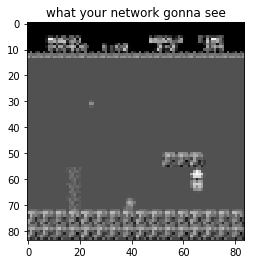

In [23]:
obs = env.reset()
obs, r, done, _ = env.step(2)

done = False
for _ in range(130):
    obs, _, done, _ = env.step(1)
    #env.render()
    obs = np.array(obs)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
print (obs.shape)
plt.imshow(obs[:,:,0],interpolation='none',cmap='gray');

In [ ]:
gym.envs.registry.all()